First we have to have our vectors $\boldsymbol{F}$, $\boldsymbol{V}$ and $\boldsymbol{\varphi}$ for each model.

In [2]:
import numpy as np

rotor_force_path = '../data/single_tip_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_seg_forces.dat'
filament_force_path = '../data/single_cilium_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_seg_forces.dat'
rotor_force = np.loadtxt(rotor_force_path)
filament_force = np.loadtxt(filament_force_path)

rotor_velocities_path = '../data/single_tip_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_seg_vels.dat'
filament_velocities_path = '../data/single_cilium_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_seg_vels.dat'
rotor_velocities = np.loadtxt(rotor_velocities_path)
filament_velocities = np.loadtxt(filament_velocities_path)

rotor_phase_path = '../data/single_tip_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_true_states.dat'
filament_phase_path = '../data/single_cilium_plane/20250113/ciliate_1fil_5000blob_4.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_true_states.dat'
rotor_phase = np.loadtxt(rotor_phase_path)
filament_phase = np.loadtxt(filament_phase_path)

We need to process all vectors

In [3]:
rotor_force.shape, filament_force.shape, rotor_velocities.shape, filament_velocities.shape, rotor_phase.shape, filament_phase.shape

((501, 13), (501, 121), (501, 13), (501, 121), (501, 3), (501, 3))

In [4]:
# Define a function to process each row
def process_row(row):
  # Drop the 0th element
  row = row[1:]
  # Create a boolean mask to keep three elements, drop three elements, repeat
  mask = np.tile([True, True, True, False, False, False], len(row) // 6 + 1)[:len(row)]
  return row[mask]

# Apply the function to each row of the rotor_force array
rotor_force = np.apply_along_axis(process_row, 1, rotor_force)
rotor_velocities = np.apply_along_axis(process_row, 1, rotor_velocities)

# Apply the function to each row of the filament_force array
filament_force = np.apply_along_axis(process_row, 1, filament_force)
filament_velocities = np.apply_along_axis(process_row, 1, filament_velocities)

In [5]:
total_rotor_force = np.sum(np.linalg.norm(rotor_force[:, i:i+3], axis=1) for i in range(0, rotor_force.shape[1], 3))
total_filament_force = np.sum(np.linalg.norm(filament_force[:, i:i+3], axis=1) for i in range(0, filament_force.shape[1], 3))

<ipython-input-5-c0d31d90a1a7>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_rotor_force = np.sum(np.linalg.norm(rotor_force[:, i:i+3], axis=1) for i in range(0, rotor_force.shape[1], 3))
<ipython-input-5-c0d31d90a1a7>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_filament_force = np.sum(np.linalg.norm(filament_force[:, i:i+3], axis=1) for i in range(0, filament_force.shape[1], 3))


In [6]:
rotor_phase = np.delete(rotor_phase, [0, 1], axis=1)
filament_phase = np.delete(filament_phase, [0, 1], axis=1)

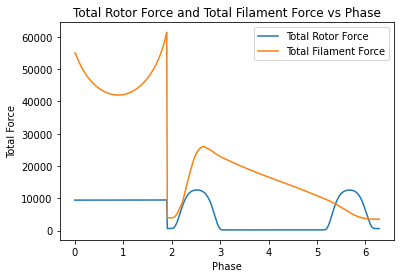

In [7]:
import matplotlib.pyplot as plt

# Roll the total force arrays by -1
total_rotor_force_rolled = np.roll(total_rotor_force, 1)
total_filament_force_rolled = np.roll(total_filament_force, 1)

# Plot total rotor force against the second column of rotor phase
plt.plot(rotor_phase, total_rotor_force_rolled, label='Total Rotor Force')

# Plot total filament force against the second column of filament phase
plt.plot(filament_phase, total_filament_force_rolled, label='Total Filament Force')

# Add labels and legend
plt.xlabel('Phase')
plt.ylabel('Total Force')
plt.title('Total Rotor Force and Total Filament Force vs Phase')
plt.legend()

# Show the plot
plt.show()

In [8]:
rotor_dissipation = np.einsum('ij,ij->i', rotor_force, rotor_velocities)
filament_dissipation = np.einsum('ij,ij->i', filament_force, filament_velocities)
rotor_gen_force = rotor_dissipation /(2.0*np.pi)
filament_gen_force = filament_dissipation /(2.0*np.pi)

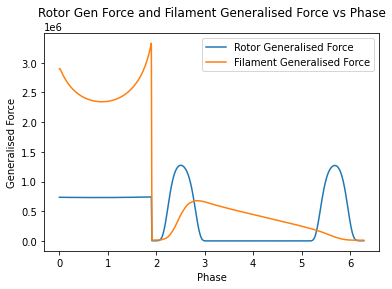

In [12]:
# Roll the gen force arrays by -1
rotor_gen_force_rolled = np.roll(rotor_gen_force, 1)
filament_gen_force_rolled = np.roll(filament_gen_force, 1)

# Plot rotor gen_force against rotor phase
plt.plot(rotor_phase, rotor_gen_force_rolled, label='Rotor Generalised Force')

# Plot filament gen_force against filament phase
plt.plot(filament_phase, filament_gen_force_rolled, label='Filament Generalised Force')

# Add labels and legend
plt.xlabel('Phase')
plt.ylabel('Generalised Force')
plt.title('Rotor Gen Force and Filament Generalised Force vs Phase')
plt.legend()

# Show the plot
plt.show()

In [10]:
tip_force = filament_force[:, -3:]
total_tip_force = np.linalg.norm(tip_force, axis=1)

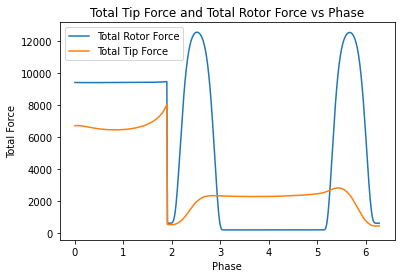

In [11]:
# Roll the total_tip_force array by -1
total_tip_force_rolled = np.roll(total_tip_force, 1)

# Plot total_rotor_force_rolled against rotor_phase
plt.plot(rotor_phase, total_rotor_force_rolled, label='Total Rotor Force')

# Plot total_tip_force_rolled against filament_phase
plt.plot(filament_phase, total_tip_force_rolled, label='Total Tip Force')

# Add labels and legend
plt.xlabel('Phase')
plt.ylabel('Total Force')
plt.title('Total Tip Force and Total Rotor Force vs Phase')
plt.legend()

# Show the plot
plt.show()